# Customer Segmentation using kmeans clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_excel(r"D:\AI\data\datasets-1\Wholesale customers data.xlsx")
df.shape

(440, 8)

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for missng values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

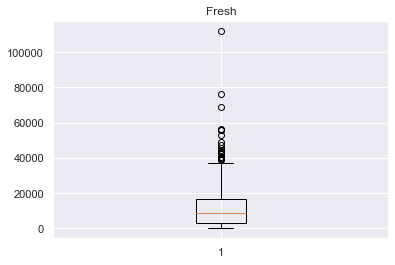

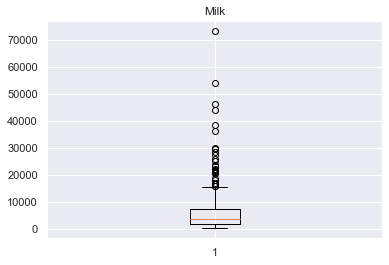

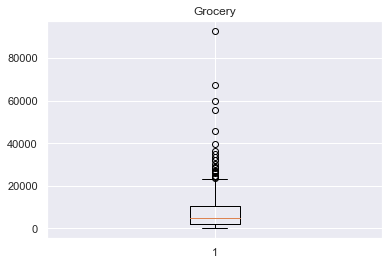

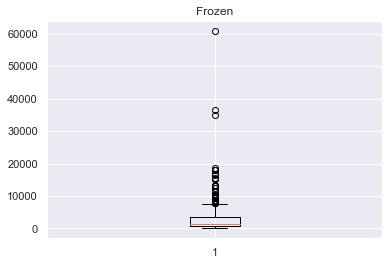

In [10]:
sns.set_theme()
for col in ["Fresh",'Milk','Grocery','Frozen']:
    plt.boxplot(df[col])
    plt.title(col)
    plt.grid(True)
    plt.show()

In [11]:
df[df.Fresh<40000].skew()

Channel              0.720980
Region              -1.268727
Fresh                1.075508
Milk                 4.051359
Grocery              3.603252
Frozen               6.410021
Detergents_Paper     3.636540
Delicassen          12.025168
dtype: float64

In [13]:
df.Fresh[df.Fresh>40000] = 40000
df.Milk[df.Milk>25000] = 25000
df.Grocery[df.Grocery>30000] = 30000
df.Frozen[df.Frozen>15000] = 15000

In [14]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.196938
Milk                 1.885618
Grocery              1.501508
Frozen               2.022515
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

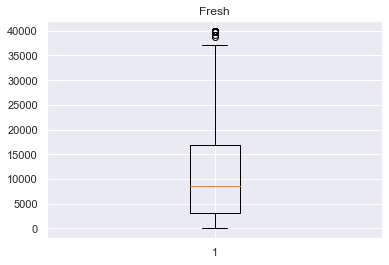

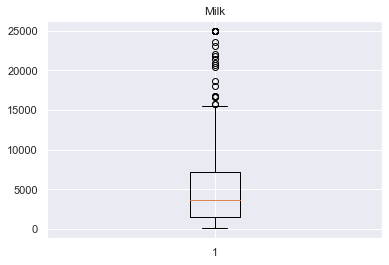

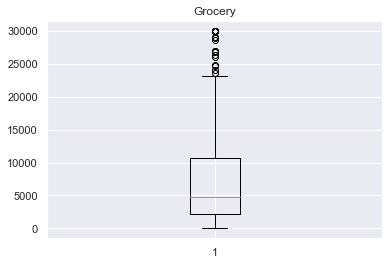

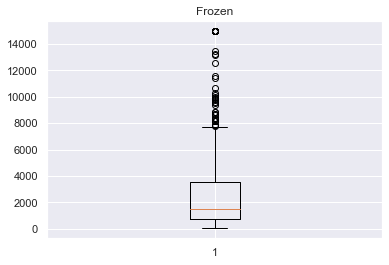

In [15]:
sns.set_theme()
for col in ["Fresh",'Milk','Grocery','Frozen']:
    plt.boxplot(df[col])
    plt.title(col)
    plt.grid(True)
    plt.show()

In [16]:
df.Fresh[df.Fresh>40000] = 40000
df.Milk[df.Milk>20000] = 20000
df.Grocery[df.Grocery>28000] = 28000
df.Frozen[df.Frozen>10000] = 10000

In [17]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.196938
Milk                 1.498400
Grocery              1.412262
Frozen               1.428338
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [18]:
df2 = df[['Fresh','Milk']]

## Clustering

In [19]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=3,random_state=True)

In [20]:
# train the model
model.fit(df2)

KMeans(n_clusters=3, random_state=True)

In [21]:
df2['cluster'] = model.predict(df2)
df2

C:\Users\admin\AppData\Local\Temp/ipykernel_19268/371482293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = model.predict(df2)


,Fresh,Milk,cluster
0,12669,9656,0
1,7057,9810,1
2,6353,8808,1
3,13265,1196,0
4,22615,5410,0
...,...,...,...
435,29703,12051,2
436,39228,1431,2
437,14531,15488,0
438,10290,1981,0


In [22]:
pd.DataFrame(model.cluster_centers_,columns=['Fresh','Milk'])

,Fresh,Milk
0,15267.278571,3539.757143
1,4110.719008,5966.438017
2,32930.379310,6515.431034


In [23]:
# 0th cluster - moderate spenders on fresh, lowest spenders on milk
# 1st cluster = lowest spenders on fresh, moderate/high spenders on milk
# 2nd cluster = big spenders

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


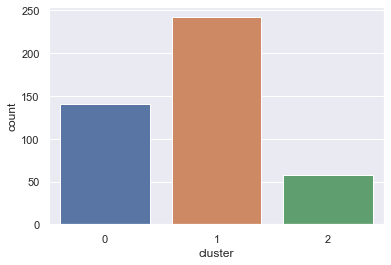

In [24]:
sns.countplot(df2['cluster'])
plt.show()

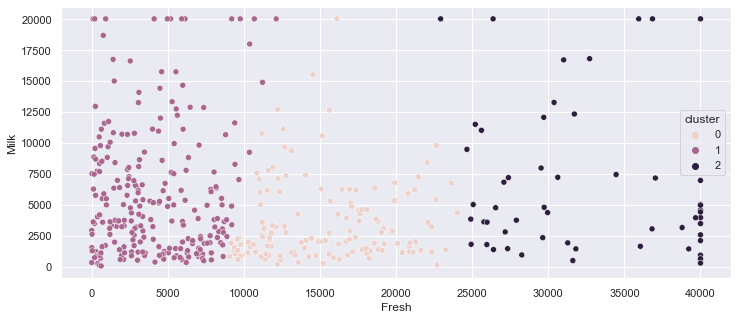

In [25]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Fresh',y='Milk',hue='cluster',data=df2)
plt.show()

##  clustering on 4 features


In [26]:
df3 = df[['Fresh','Milk','Grocery','Frozen']]

from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3,random_state=5)

model2.fit(df3)

KMeans(n_clusters=3, random_state=5)

In [28]:
pd.DataFrame(model2.cluster_centers_,columns=df3.columns)

,Fresh,Milk,Grocery,Frozen
0,5182.242105,11070.778947,17982.768421,1508.231579
1,28929.609195,5298.804598,6641.666667,4329.448276
2,7879.790698,3118.678295,3821.329457,2526.972868


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


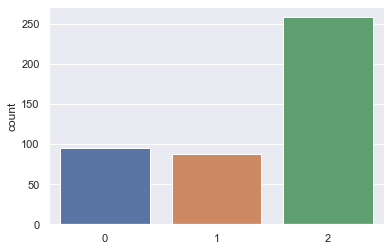

In [29]:
sns.countplot(model2.labels_)
plt.show()

## Finding best value of k

In [33]:
k = np.arange(2,15,1)
inertia = []

from sklearn.cluster import KMeans


for i in k:
    model = KMeans(n_clusters=i,random_state=3)
    model.fit(df3)
    inertia.append(model.inertia_)

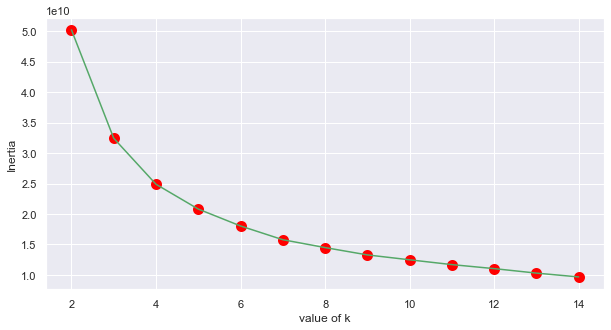

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(k,inertia,c='red',linewidths=5)
plt.plot(k,inertia,c='g')
plt.xlabel("value of k")
plt.ylabel("Inertia")
plt.show()